In [1]:
# /usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import animation
from PIL import Image


def update(f):
    global loc
    if f == 0:
        loc = loc_prime
    next_loc = np.zeros((m, n), dtype=np.float)
    for i in np.arange(m):
        for j in np.arange(n):
            next_loc[i, j] = calc_next_loc(np.array([i, j]), loc, directions)
    loc = next_loc / np.max(next_loc)
    im.set_array(loc)

    # Save
    if save_image:
        if f % 3 == 0:
            image_data = plt.cm.coolwarm(loc) * 255
            image_data, _ = np.split(image_data, (-1,), axis=2)
            image_data = image_data.astype(np.uint8).clip(0, 255)
            output = './Pic2/'
            if not os.path.exists(output):
                os.mkdir(output)
            a = Image.fromarray(image_data, mode='RGB')
            a.save('%s%d.png' % (output, f))
    return [im]


def calc_next_loc(now, loc, directions):
    near_index = np.array([(-1, -1), (-1, 0), (-1, 1),
                           (0, -1), (0, 1),
                           (1, -1), (1, 0), (1, 1)])
    directions_index = np.array([7, 6, 5, 0, 4, 1, 2, 3])
    nn = now + near_index
    ii, jj = nn[:, 0], nn[:, 1]
    ii[ii >= m] = 0
    jj[jj >= n] = 0
    return np.dot(loc[ii, jj], directions[ii, jj, directions_index])

[[[ 0.00000814  0.00014831  0.00000894  0.00000808  0.00000628  0.00000958  0.00000649  0.00001323]
  [ 0.00001429  0.00014831  0.00001174  0.00000784  0.00000842  0.00001373  0.00000105  0.00000129]
  [ 0.0000003   0.00014831  0.00001154  0.0000129   0.00001451  0.00001185  0.00000684  0.00001158]
  [ 0.00000175  0.00014831  0.00000213  0.00001401  0.00000774  0.00000615  0.00000392  0.00001148]
  [ 0.00000677  0.00014831  0.00000028  0.00000916  0.00000908  0.00000915  0.000014    0.00001011]
  [ 0.00000533  0.00014831  0.00001035  0.00000089  0.00000989  0.00000995  0.00000312  0.00000191]
  [ 0.00014831  0.00000539  0.00000846  0.00000651  0.00001466  0.00000151  0.0000031   0.00000239]
  [ 0.00014831  0.00000376  0.00000692  0.00000363  0.00000236  0.00000164  0.00000973  0.00000205]
  ..., 
  [ 0.00014831  0.00000778  0.00000174  0.00000237  0.00000069  0.0000144   0.00000006  0.00000265]
  [ 0.00014831  0.00000121  0.00001308  0.00001067  0.00001433  0.00000753  0.00000446  0.00

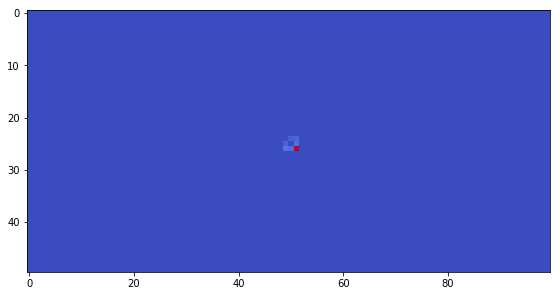

In [2]:
np.set_printoptions(suppress=True, linewidth=300, edgeitems=8)
np.random.seed(0)

save_image = False
style = 'Sin'  # Sin/Direct/Random
m, n = 50, 100
directions = np.random.rand(m, n, 8)

if style == 'Direct':
    directions[:, :, 1] = 10
elif style == 'Sin':
    x = np.arange(n)
    y_d = np.cos(6 * np.pi * x / n)
    theta = np.empty_like(x, dtype=np.int)
    theta[y_d > 0.5] = 1
    theta[~(y_d > 0.5) & (y_d > -0.5)] = 0
    theta[~(y_d > -0.5)] = 7
    directions[:, x.astype(np.int), theta] = 10
directions[:, :] /= np.sum(directions[:, :])
print directions

loc = np.zeros((m, n), dtype=np.float)
loc[m / 2, n / 2] = 1
loc_prime = np.empty_like(loc)
loc_prime = loc
fig = plt.figure(figsize=(8, 6), facecolor='w')
im = plt.imshow(loc / np.max(loc), cmap='coolwarm')
anim = animation.FuncAnimation(fig, update, frames=300, interval=50, blit=True)
plt.tight_layout(1.5)
plt.show()